# Heart disease prediction

Notebook containing EDA and prediction models for predicting heart disease using the UCI dataset. 

Dataset available here: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


Using a simple classification model, we are able to accurately classify people with and without heart disease with ~85% accuracy.


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Load dataset
data = pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


We see that there are several categorical variables in the dataset that need to be encoded. The numerical variables also need to be scaled. 

In [24]:
# Encode variables
data_1 = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


# Map True to 1 and False to 0 in encoded columns
def map_boolean_to_numeric(value):
    return 1 if value else 0

columns_to_encode = ['sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
                     'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
                     'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
                     'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat',
                     'slope_upsloping', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0',
                     'thal_fixed defect', 'thal_normal', 'thal_reversable defect']

data_1[columns_to_encode] = data_1[columns_to_encode].applymap(map_boolean_to_numeric)

# Preview data
data_1.head()


,id,age,dataset,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,...,slope_downsloping,slope_flat,slope_upsloping,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,Cleveland,145.0,233.0,150.0,2.3,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,2,67,Cleveland,160.0,286.0,108.0,1.5,2,0,1,...,0,1,0,0,0,0,1,0,1,0
2,3,67,Cleveland,120.0,229.0,129.0,2.6,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,4,37,Cleveland,130.0,250.0,187.0,3.5,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4,5,41,Cleveland,130.0,204.0,172.0,1.4,0,1,0,...,0,0,1,1,0,0,0,0,1,0


### Exploratory data analysis

Before we dive into any ML, lets explore the dataset

Text(0.5, 0, 'Age (years)')

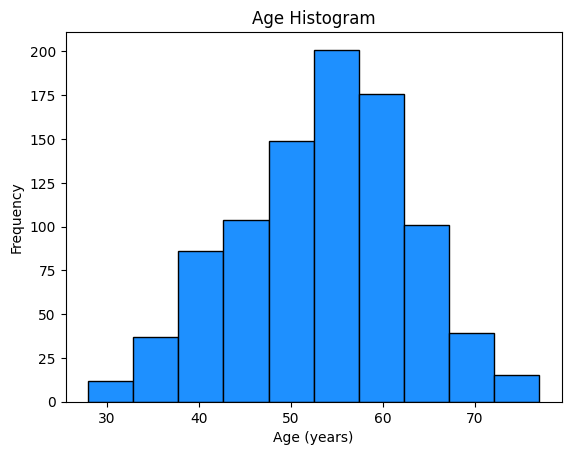

In [32]:
# Age histogram
data_1['age'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Age Histogram')
plt.xlabel('Age (years)')


Text(0.5, 0, 'BPS')

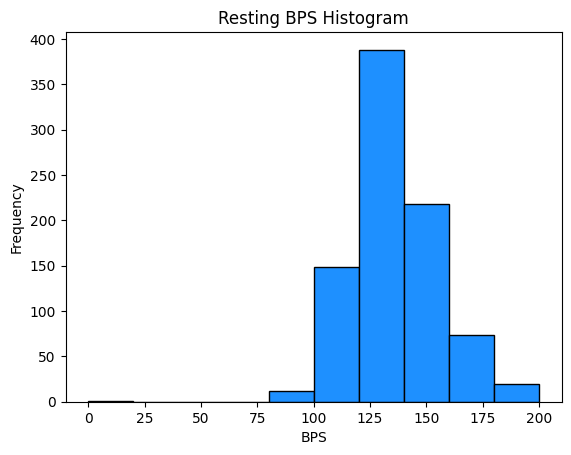

In [33]:
# Resting BPS histogram
data_1['trestbps'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Resting BPS Histogram')
plt.xlabel('BPS')

Text(0.5, 0, 'Cholesteral')

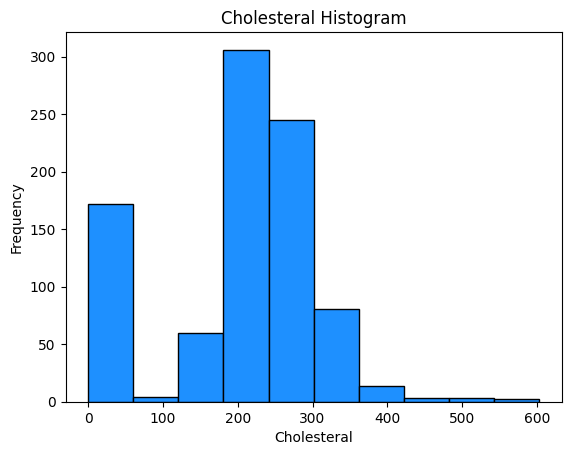

In [34]:
# Cholesterol histogram
data_1['chol'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Cholesteral Histogram')
plt.xlabel('Cholesteral')

Text(0.5, 0, 'Max Heart Rate')

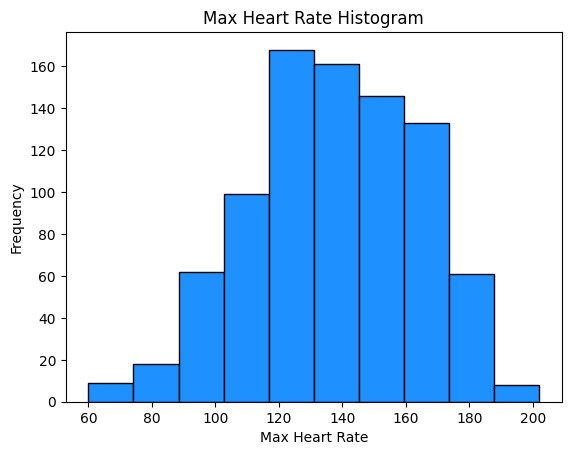

In [43]:
# Maximum heart rate
data_1['thalch'].plot(kind='hist', bins=10, edgecolor='black', color='dodgerblue')
plt.title('Max Heart Rate Histogram')
plt.xlabel('Max Heart Rate')

Text(0.5, 1.0, 'Sex Distribution')

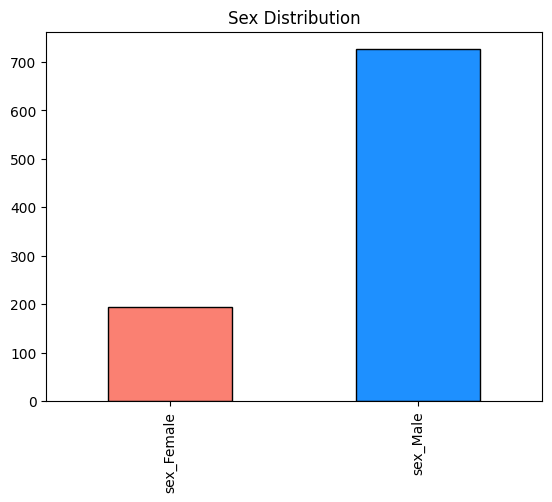

In [39]:
# Sex distribution
sex_counts = data_1[['sex_Female', 'sex_Male']].sum()
sex_counts.plot(kind='bar', color=['salmon', 'dodgerblue'], edgecolor='black')
plt.title('Sex Distribution')

Text(0.5, 1.0, 'Types of Chest Pain')

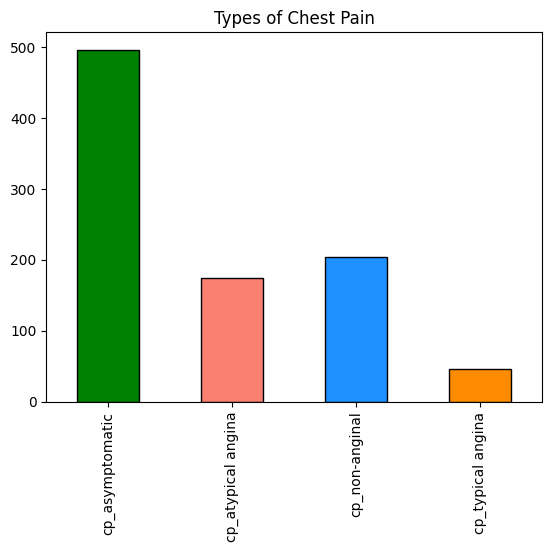

In [41]:
# Chest pain distribution
sex_counts = data_1[['cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']].sum()
sex_counts.plot(kind='bar', color=['green', 'salmon', 'dodgerblue', 'darkorange'], edgecolor='black')
plt.title('Types of Chest Pain')

Text(0.5, 1.0, 'Number of Major Vessesls Colored  by Flouroscopy')

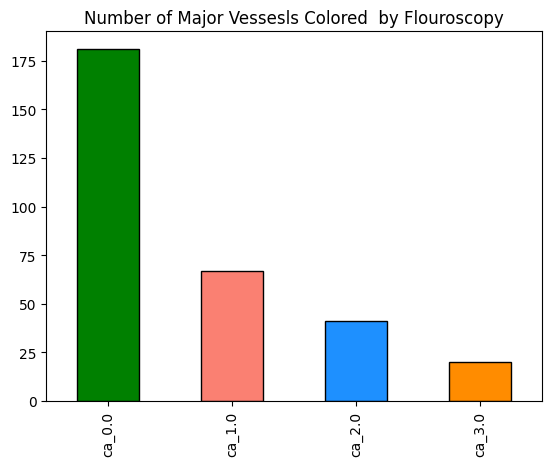

In [44]:
# Number of major vessels colored by flouroscopy count
sex_counts = data_1[['ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0']].sum()
sex_counts.plot(kind='bar', color=['green', 'salmon', 'dodgerblue', 'darkorange'], edgecolor='black')
plt.title('Number of Major Vessesls Colored  by Flouroscopy')

Now that we have an idea of the distributions of continuous variables and counts of categorical variables, we can try some ML models to see if we can predict the target class. 

The UCI heart disease dataset has some variations available online. The Cleavland dataset has been clasically used for ML models. For this dataset, we have four locations and 5 different classes (column ID == num)
* 0 = no heart disease
* 1 = stage 1 heart disease
* 2 = stage 2 heart disease
* 3 = stage 3 heart disease
* 4 = stage 4 heart disease

First, lets try a binary classification to predict either 0 (no heart disease) or labels 2-4 (heart disease)


Text(0.5, 1.0, 'Binary Class Distribution (0 = No HD, 1 = HD)')

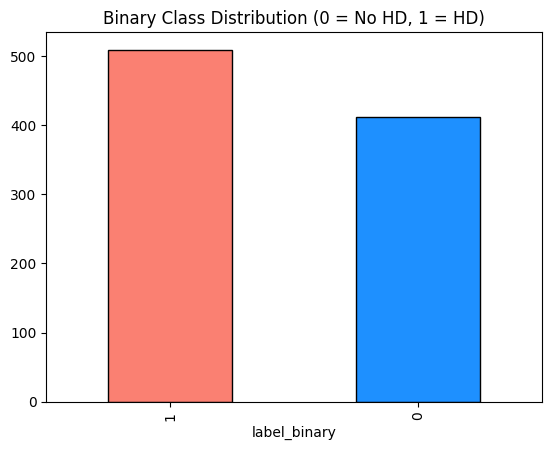

In [56]:
# Drop columns and assign a new dataframe
data_2 = data_1.drop(['id', 'dataset'], axis=1)

# Create a new column for binary classification
data_2['label_binary'] = np.where(data_2['num'] == 0, 0, 1)

# Visualize class distribution for binary case
binary_counts = data_2['label_binary'].value_counts()
binary_counts.plot(kind='bar', color=['salmon', 'dodgerblue'], edgecolor='black')
plt.title('Binary Class Distribution (0 = No HD, 1 = HD)')


Looks like we have an approximately equal number of class labels. Before any predictive modeling, lets scale our continuous variables.

In [57]:
# Scale data
scaler = StandardScaler()
data_2[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(data_2[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])

# We can also remove the 'num' column from this dataset
data_2 = data_2.drop(['num'], axis=1)

# Print number of rows before removing NaNs
print('Number of rows before removing NaNs: ', len(data_2))

# Remove any rows that contain NaNs
data_2 = data_2.dropna()

# Print number of rows after removing NaNs
print('Number of rows before removing NaNs: ', len(data_2))

# Preview dataframe
data_2.head()


Number of rows before removing NaNs:  920
Number of rows before removing NaNs:  827


,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,slope_flat,slope_upsloping,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_fixed defect,thal_normal,thal_reversable defect,label_binary
0,1.007386,0.675287,0.305908,0.480653,1.303159,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1.432034,1.462483,0.784599,-1.140262,0.569611,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,1
2,1.432034,-0.636705,0.269780,-0.329805,1.578239,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,1
3,-1.752828,-0.111908,0.459450,1.908602,2.403480,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,-1.328180,-0.111908,0.043982,1.329704,0.477918,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0


#### Assign training and testing data

In [58]:
# Assign labels and data
y = data_2['label_binary']
X = data_2.drop(['label_binary'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### KNN Classifier

K-nearest neighbors with k ranging from 1 to 50

K with highest accuracy 10


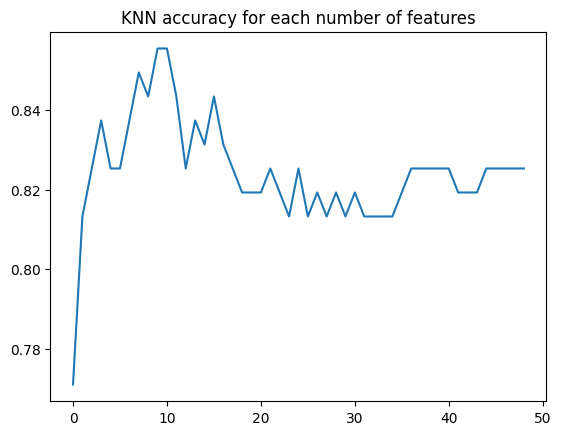

In [63]:
# Train and test algorithm for K = 1:50
knn_accuracies = []
for n in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors = n)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    knn_accuracies.append(accuracy)
    
# Plot accuracy 
plt.plot(knn_accuracies)
plt.title('KNN accuracy for each number of features')

# Print the number of neighbors with the highest accuracy
print(f'K with highest accuracy {np.argmax(knn_accuracies)+1}')

So it looks like we should set k=10 to get the best performance

Accuracy: 0.8554216867469879


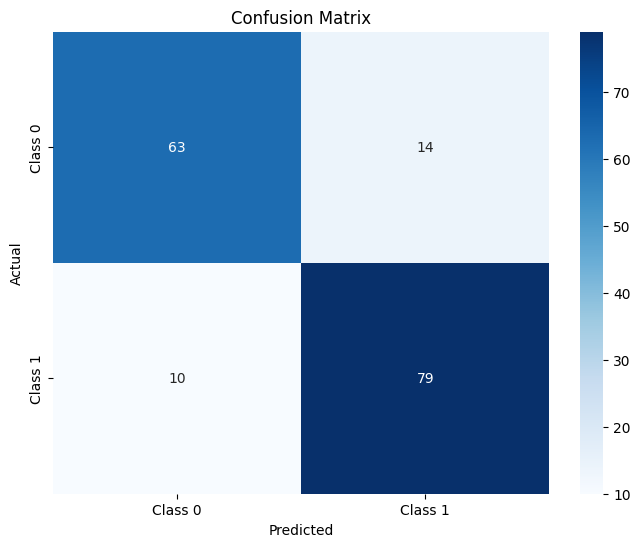

In [66]:
# Fit classifier with k=10
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
# Accuracy
print("Accuracy:", accuracy)

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Looks like KNN performs pretty well with this dataset. Lets try SVM next.

#### Support Vector Machine

SVM has multiple hyperparams including kernel, regularization, and degree of polynomial kernel. Lets try each of the different kernels and see which one performs the best

In [72]:
# Linear kernel

# List to store accuracies
svm_accuracies = []

# Loop over range of regularization params
for c_param in range(1,11):
    
    # Fit model and calculate training accuracy
    svm = SVC(kernel='linear', C=c_param)
    svm.fit(X_train, y_train)
    svm_accuracies.append(svm.score(X_test, y_test))

print('----Linear Kernel Results----')
print(f'Highest accuracy: {max(svm_accuracies)}')
print(f'C with highest accuracy {np.argmax(svm_accuracies)+1}')


----Linear Kernel Results----
Highest accuracy: 0.8132530120481928
C with highest accuracy 2


In [73]:
# RBF kernel

# List to store accuracies
svm_accuracies = []

# Loop over range of regularization params
for c_param in range(1,11):
    
    # Fit model and calculate training accuracy
    svm = SVC(kernel='rbf', C=c_param)
    svm.fit(X_train, y_train)
    svm_accuracies.append(svm.score(X_test, y_test))

print('----RBF Kernel Results----')
print(f'Highest accuracy: {max(svm_accuracies)}')
print(f'C with highest accuracy {np.argmax(svm_accuracies)+1}')

----RBF Kernel Results----
Highest accuracy: 0.8132530120481928
C with highest accuracy 1


In [75]:
# Polynomail kernel

# List to store accuracies
svm_accuracies = []

# Loop over range of regularization params
for c_param in range(1,11):
    
    for p in range(2,6):
    
        # Fit model and calculate training accuracy
        svm = SVC(kernel='poly', C=c_param, degree=p)
        svm.fit(X_train, y_train)
        svm_accuracies.append(svm.score(X_test, y_test))

print('----Polynomial Kernel Results----')
print(f'Highest accuracy: {max(svm_accuracies)}')

----Polynomial Kernel Results----
Highest accuracy: 0.8072289156626506


Clearly, the RBF and linear kernels perform the best. See results on test set

In [77]:
# Fit and test model with RBF kernel
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'RBF Kernel Test Accuracy: ', accuracy_score(y_test, y_pred))

# Fit and test model with linear kernel
svm = SVC(kernel='linear', C=2)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'Linear Kernel Test Accuracy: ', accuracy_score(y_test, y_pred))

RBF Kernel Test Accuracy:  0.8132530120481928
Linear Kernel Test Accuracy:  0.8132530120481928


Looks like we get the same accuracy for both kernels, however niether of them outperform KNN. Lets try a decision tree model next. 

#### Decision Tree

There are two different criterion for determining the nodes for each split (Gini and Entropy). Entropy measures the level of disorder and Gini impurity quantifies the probability of misclassifying an instance.

In [79]:
# Gini criterion

# List of accuracies
dt_accuracies = []
    
# Loop over range of number of features
for i in range(1, len(X_train.columns)+1):

    dt = DecisionTreeClassifier(criterion='gini', max_features=i, random_state=42)
    dt.fit(X_train, y_train)
    dt_accuracies.append(dt.score(X_test, y_test))

# Print results
print('----Gini Criterion Results----')
print(f'Highest accuracy: {max(dt_accuracies)}')
print(f'Max features with highest accuracy {np.argmax(dt_accuracies)+1}')


----Gini Criterion Results----
Highest accuracy: 0.7590361445783133
Max features with highest accuracy 2


In [80]:
# Entropy criterion

# List of accuracies
dt_accuracies = []
    
# Loop over range of number of features
for i in range(1, len(X_train.columns)+1):

    dt = DecisionTreeClassifier(criterion='entropy', max_features=i, random_state=42)
    dt.fit(X_train, y_train)
    dt_accuracies.append(dt.score(X_test, y_test))

# Print results
print('----Entropy Criterion Results----')
print(f'Highest accuracy: {max(dt_accuracies)}')
print(f'Max features with highest accuracy {np.argmax(dt_accuracies)+1}')

----Entropy Criterion Results----
Highest accuracy: 0.7771084337349398
Max features with highest accuracy 9


Neither criterion for a decision tree outperformed KNN. Lets try logistic regression as our final model.

For LR, we'll try a few different penalty terms and several regularization params.

In [86]:
# L1 penalty with liblinear solver

# List to store accuracies
lr_accuracies = []

# List of C params
c_params = [0.001, 0.01, 0.1, 1, 5, 10]

# Loop over range of regularization params
for c_param in c_params:
    
    # Fit model and calculate training accuracy
    lr = LogisticRegression(penalty='l1', C=c_param, solver='liblinear')
    lr.fit(X_train, y_train)
    lr_accuracies.append(lr.score(X_test, y_test))

print('----L1 Penalty Results----')
print(f'Highest accuracy: {max(lr_accuracies)}')
print(f'C with highest accuracy {np.argmax(lr_accuracies)+1}')

----L1 Penalty Results----
Highest accuracy: 0.8313253012048193
C with highest accuracy 3


In [89]:
# L2 penalty with liblinear solver

# List to store accuracies
lr_accuracies = []

# List of C params
c_params = [0.001, 0.01, 0.1, 1, 5, 10]

# Loop over range of regularization params
for c_param in c_params:
    
    # Fit model and calculate training accuracy
    lr = LogisticRegression(penalty='l2', C=c_param, solver='liblinear')
    lr.fit(X_train, y_train)
    lr_accuracies.append(lr.score(X_test, y_test))

print('----L2 Penalty Results----')
print(f'Highest accuracy: {max(lr_accuracies)}')
print(f'C with highest accuracy {np.argmax(lr_accuracies)+1}')

----L2 Penalty Results----
Highest accuracy: 0.8253012048192772
C with highest accuracy 2


In [91]:
# No penalty

# List to store accuracies
lr_accuracies = []

# List of C params
c_params = [0.001, 0.01, 0.1, 1, 5, 10]

# Loop over range of regularization params
for c_param in c_params:
    
    # Fit model and calculate training accuracy
    lr = LogisticRegression(penalty=None, C=c_param, solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_accuracies.append(lr.score(X_test, y_test))

print('----No Penalty Results----')
print(f'Highest accuracy: {max(lr_accuracies)}')
print(f'C with highest accuracy {np.argmax(lr_accuracies)+1}')

----No Penalty Results----
Highest accuracy: 0.8192771084337349
C with highest accuracy 1


/Users/rossbrancati/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rossbrancati/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rossbrancati/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rossbrancati/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_

LR performed pretty well (still a couple percent lower than KNN in terms of test set accuracy).

Overall, a test set accuracy of 85% is pretty good for a health care related dataset. Unfortunately one of the limitations of KNN is that it isn't very interpretable (unlike LR or SVM). Interpreting the features could provide the user/researcher with a better idea of features that are most important for classifying these groups. Interpretable models should be considered in real-world scenarios. 

Conclusions:

* We were able to achieve 85% accuracy in predicting risk of heart disease with a simple classifier model, which is pretty good performance in a health care application. 
* Other classifiers did not perform as well with this dataset. Perhaps they perform better with different features, more observations, etc. One of the limitations in ML for health care applications is the availability of robust, clean data to train these models with. 
* We tried many different hyperparameters, and could continue to test more to improve accuracy
* The confusion matrix from the KNN model shows that this model does not produce many false positives (10) or false negatives (14), which is very important for this application. Neither situation is great, but we really want to try to avoid false negative cases where a patient's risk may be undermined. Better to have a false positive than a false negative, but neither are ideal. 